# Matplotlib & Basic Regression Practice (Lab2)

This notebook offers a set of solutions to different tasks with Matplotlib.



In [1]:
# Import the pyplot module from matplotlib as plt and make sure
# plots appear in the notebook using '%matplotlib inline'
%matplotlib inline
import matplotlib.pyplot as plt


[]

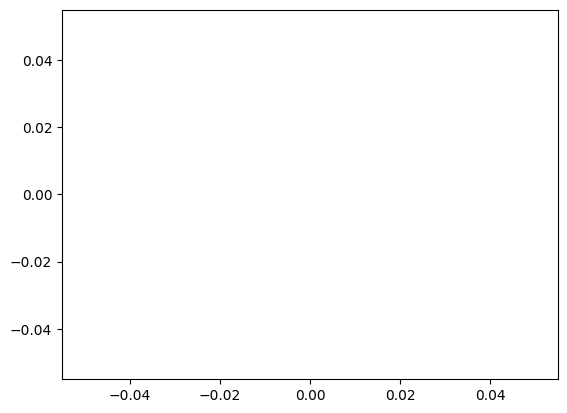

In [2]:
# Create a simple plot using plt.plot()
plt.plot()


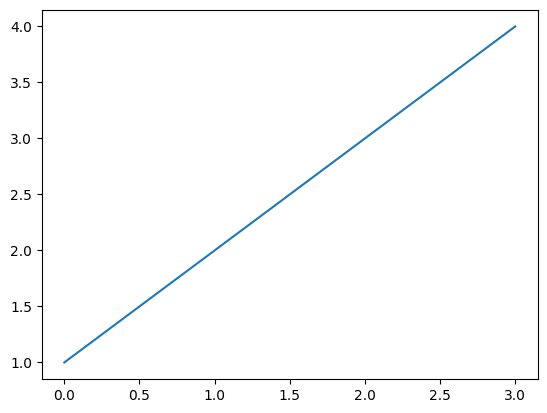

In [3]:
# Plot a single Python list
plt.plot([1, 2, 3, 4])


In [4]:
# Create two lists, one called X, one called y, each with 5 numbers in them
x = [1, 2, 3, 4, 5]
y = [11, 22, 33, 44, 55]


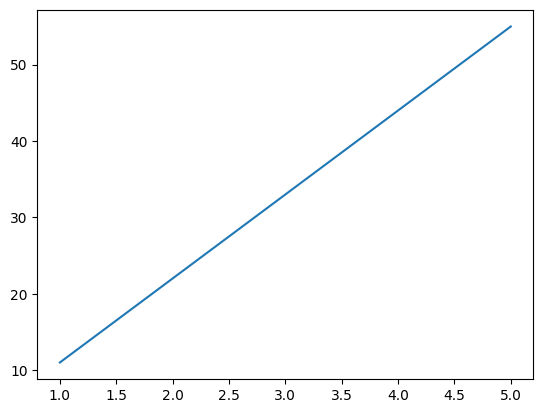

In [5]:
# Plot X & y (the lists you've created)
plt.plot(x, y);


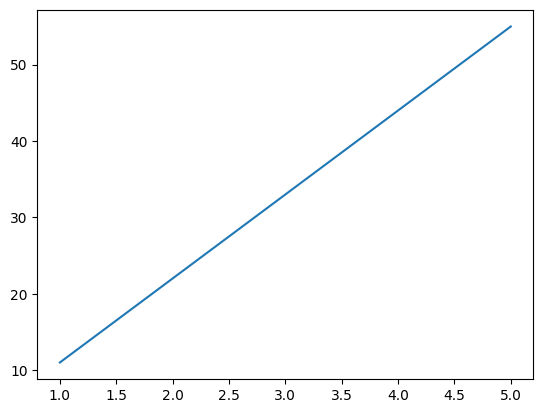

In [6]:
# Create a plot using plt.subplots() and then add X & y on the axes
fig, ax = plt.subplots()
ax.plot(x, y);


Now let's try a small matplotlib workflow.

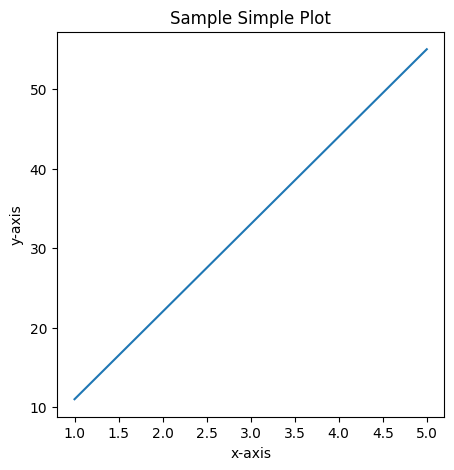

In [7]:
# CODE HERE
# Import and get matplotlib ready
%matplotlib inline
import matplotlib.pyplot as plt

# Prepare data (create two lists of 5 numbers, X & y)
x = [1, 2, 3, 4, 5]
y = [11, 22, 33, 44, 55]


# Setup figure and axes using plt.subplots()
fig, ax = plt.subplots(figsize=(5,5))

# Add data (X, y) to axes
ax.plot(x, y)

# Customize plot by adding a title, xlabel and ylabel
ax.set(title="Sample Simple Plot", xlabel="x-axis", ylabel="y-axis")

# Save the plot to file using fig.savefig()
fig.savefig("simple-plot.png")


### Bar
* Vertical
* Horizontal

How about we try another type of plot? This time let's look at a bar plot. First we'll make some data.

In [8]:
# You can make plots from a dictionary
# Create a Python dictionary of 3 of your favourite foods with
# The keys of the dictionary should be the food name and the values their price
favorite_food = {"Pizza": 129,
                     "Burger": 60,
                     "Fried Chicken": 99}

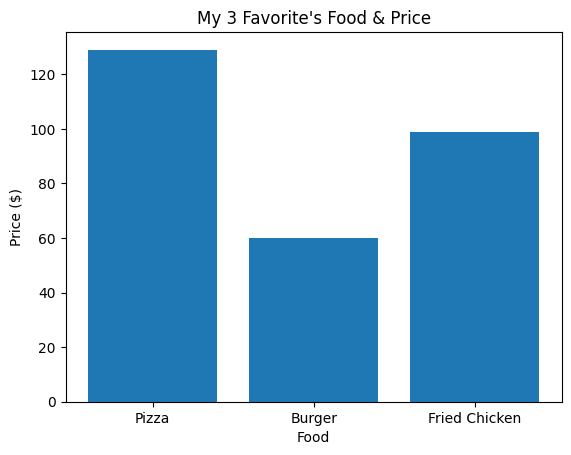

In [9]:
# Create a bar graph where the x-axis is the keys of the dictionary
# and the y-axis is the values of the dictionary
fig, ax = plt.subplots()
ax.bar(favorite_food.keys(), favorite_food.values())

# Add a title, xlabel and ylabel to the plot
ax.set(title="My 3 Favorite's Food & Price", xlabel="Food", ylabel="Price ($)");

<BarContainer object of 3 artists>

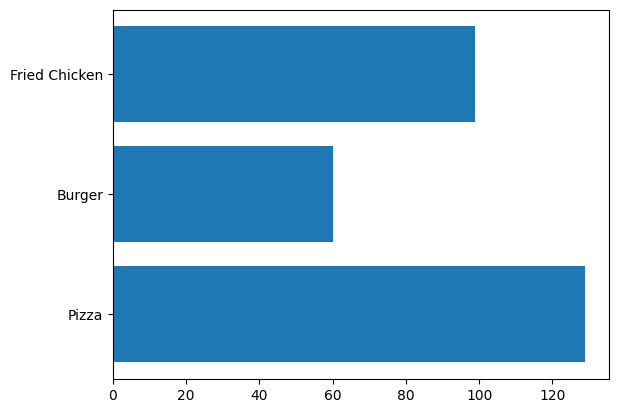

In [10]:
# Make the same plot as above, except this time make the bars go horizontal
fig, ax = plt.subplots()
ax.barh(list(favorite_food.keys()), list(favorite_food.values()))


### Subplots
* Multiple plots on one figure
https://matplotlib.org/3.1.1/gallery/recipes/create_subplots.html

In [11]:
# Import NumPy as np
import numpy as np
X = np.random.random(1000)
X

array([8.40452530e-01, 4.19108440e-01, 5.30828801e-01, 8.93009472e-01,
       7.53006263e-01, 1.27482191e-02, 9.14062260e-01, 8.18233348e-01,
       1.72760397e-01, 3.77822667e-01, 2.14033820e-01, 5.22580669e-02,
       8.34098015e-01, 1.77496404e-01, 2.71221191e-01, 4.06544593e-01,
       6.46786697e-01, 3.98904101e-01, 3.24830448e-01, 8.74237053e-01,
       4.01776904e-01, 1.52955424e-02, 2.52643585e-01, 9.77938758e-01,
       2.48855666e-01, 7.99313537e-01, 1.78993460e-01, 1.93531237e-01,
       6.34995250e-01, 9.45193826e-02, 7.53410749e-01, 4.82639012e-01,
       8.85908505e-01, 8.76995779e-01, 1.12030829e-01, 3.24934202e-01,
       2.15474983e-01, 9.71938788e-01, 7.66792900e-01, 6.21274811e-01,
       1.65550211e-01, 6.80549863e-01, 8.28245923e-02, 3.45975178e-02,
       8.82301327e-01, 9.05068590e-01, 6.34130343e-01, 4.38483545e-02,
       2.26594265e-01, 9.70525253e-01, 2.63207942e-01, 4.86054790e-01,
       4.08519095e-01, 8.85149190e-01, 2.81320459e-01, 3.33974694e-01,
      

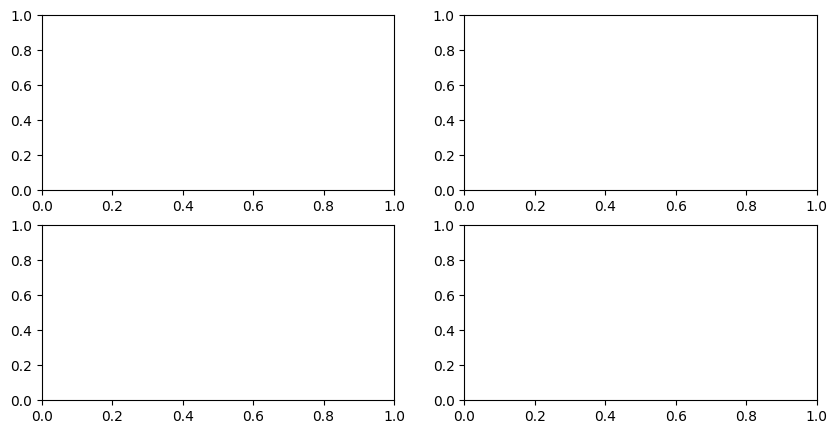

In [12]:
# Create an empty subplot with 2 rows and 2 columns (4 subplots total)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

Notice how the subplot has multiple figures. Now let's add data to each axes.

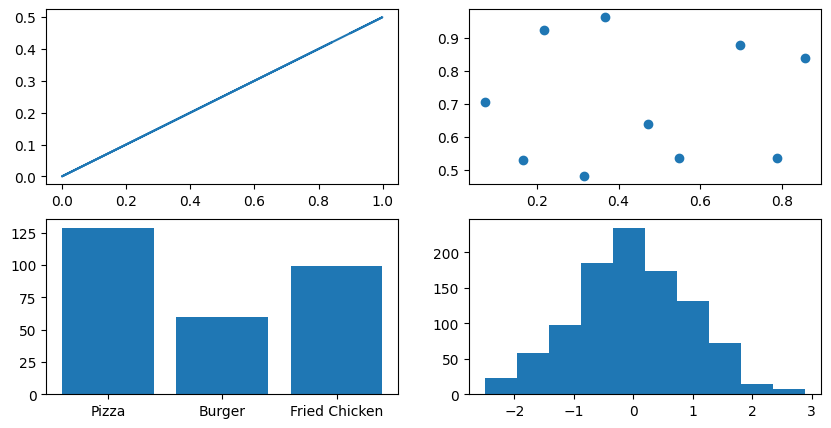

In [13]:
# CODE HERE
# Create the same plot as above with 2 rows and 2 columns and figsize of (10, 5)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Plot X versus X/2 on the top left axes
ax1.plot(X, X/2);

# Plot a scatter plot of 10 random numbers on each axis on the top right subplot
ax2.scatter(np.random.random(10), np.random.random(10));

# Plot a bar graph of the favourite food keys and values on the bottom left subplot
ax3.bar(favorite_food.keys(), favorite_food.values());

# Plot a histogram of 1000 random normally distributed numbers on the bottom right subplot
ax4.hist(np.random.randn(1000));


# Regression Problem
## Example 1: Linear Regression on Housing Dataset

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature.

## 1. Understand Data With Descriptive Statistics
### 1.1. Peek at Your Data
create 2 variables called X and y: <br>
X shall be a matrix with 3 columns (sqft,bdrms,age) <br>
y shall be a vector with 1 column (price) <br>

In [14]:
# Import pandas as pd
import pandas as pd

In [15]:
# Import the 'https://raw.githubusercontent.com/TipGreenTea/ITDS251x2-ML/main/housing-data.csv' into a DataFame
house_sales = pd.read_csv("https://raw.githubusercontent.com/TipGreenTea/ITDS251x2-ML/main/housing-data.csv")
house_sales

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900
5,1985,4,61,299900
6,1534,3,12,314900
7,1427,3,57,198999
8,1380,3,14,212000
9,1494,3,15,242500


### 1.2. Dimensions of Your Data
You must have a very good handle on how much data you have, both in terms of rows and columns.
  Too many rows and algorithms may take too long to train. Too few and perhaps you do not have enough data to train the algorithms.
  Too many features and some algorithms can be distracted or suffer poor performance due to the curse of dimensionality.

In [16]:
# CODE HERE
house_sales.shape


(47, 4)

### 1.3. Data Type For Each Attribute
The type of each attribute is important. Strings may need to be converted to floating point values or integers to represent categorical or ordinal values. You can get an idea of the types of attributes by peeking at the raw data, as above. You can also list the data types used by the DataFrame to characterize each attribute using the dtypes property.

In [17]:
# CODE HERE
house_sales.dtypes


,0
sqft,int64
bdrms,int64
age,int64
price,int64


### 1.4. Descriptive Statistics
Descriptive statistics can give you great insight into the properties of each attribute. Often you can create more summaries than you have time to review. The describe() function on the Pandas DataFrame lists 8 statistical properties of each attribute.

In [18]:
# CODE HERE
house_sales.describe()


,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


## 2. Understand Data With Visualization
### 2.1. Univariate Plots
In this section we will look at three techniques that you can use to understand each attribute of your dataset independently.
  Histograms.
  Density Plots.
  Box and Whisker Plots.
#### Histograms
A fast way to get an idea of the distribution of each attribute is to look at histograms. Histograms group data into bins and provide you a count of the number of observations in each bin. From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed or even has an exponential distribution. It can also help you see possible outliers.

array([[<Axes: title={'center': 'sqft'}>,
        <Axes: title={'center': 'bdrms'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

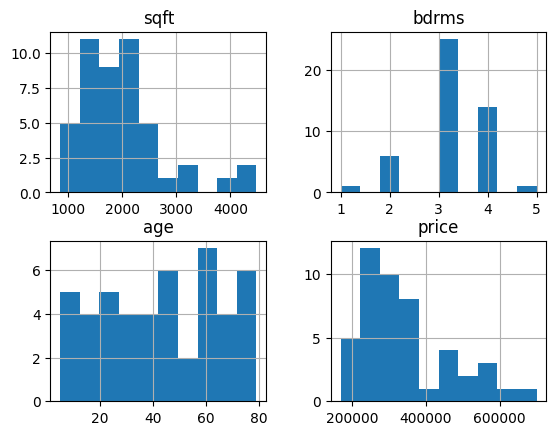

In [19]:
# CODE HERE
house_sales.hist()


### 2.2. Multivariate Plots
This section provides examples of two plots that show the interactions between multiple variables in your dataset.
  Correlation Matrix Plot.   Scatter Plot Matrix.
#### Correlation Matrix Plot
Correlation gives an indication of how related the changes are between two variables. If two variables change in the same direction they are positively correlated. If they change in opposite directions together (one goes up, one goes down), then they are negatively correlated. You can calculate the correlation between each pair of attributes. This is called a correlation matrix. You can then plot the correlation matrix and get an idea of which variables have a high correlation with each other. This is useful to know, because some machine learning algorithms like linear and logistic regression can have poor performance if there are highly correlated input variables in your data.

In [20]:
# CODE HERE
house_sales.corr()


,sqft,bdrms,age,price
sqft,1.000000,0.559967,0.079853,0.854988
bdrms,0.559967,1.000000,0.077486,0.442261
age,0.079853,0.077486,1.000000,0.051791
price,0.854988,0.442261,0.051791,1.000000


#### Scatter Plot Matrix
A scatter plot shows the relationship between two variables as dots in two dimensions, one axis for each attribute. You can create a scatter plot for each pair of attributes in your data. Drawing all these scatter plots together is called a scatter plot matrix. Scatter plots are useful for spotting structured relationships between variables, like whether you could summarize the relationship between two variables with a line. Attributes with structured relationships may also be correlated and good candidates for removal from your dataset.

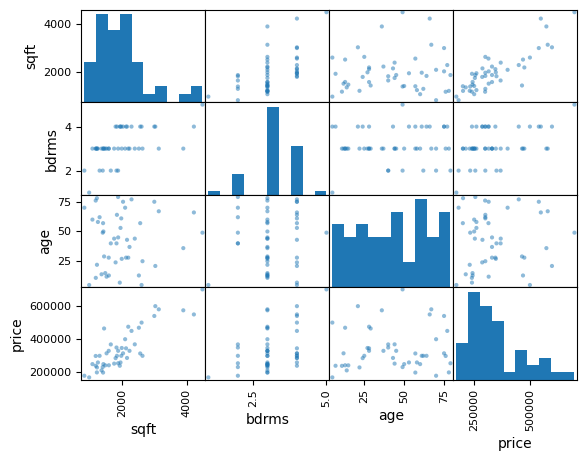

In [21]:
# CODE HERE
pd.plotting.scatter_matrix(house_sales)
plt.show()


## 3. Prepare Your Data For Machine Learning (Regression Problem)




In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np
# CODE HERE
# Defining the features and target variable
X = house_sales.drop('price', axis=1)
y = house_sales['price']

# Splitting the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #20% test

# Creating and fitting the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicting values for the validation set
y_pred = lr_model.predict(X_test)

# Displaying the parameters of the linear model
coefficients = lr_model.coef_
intercept = lr_model.intercept_

# Comparing predicted values with actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Evaluating the model
mae_test = mean_absolute_error(y_test, y_pred)

coefficients, intercept, comparison, mae_test

(array([   143.34116695, -13537.65106075,    -21.00899506]),
 np.float64(85504.10621916072),
     Actual      Predicted
 27  469000  406697.823824
 39  287000  340353.718141
 26  464500  253273.313597
 43  299000  215303.869756
 24  573900  601731.968661
 36  229900  222028.661000
 12  329999  314860.553800
 19  599000  465379.390114
 4   539900  459801.328205
 25  249900  201305.896982,
 72373.38495240989)